In [110]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.losses import SparseCategoricalCrossentropy

from PIL import Image, ImageDraw
from keras.preprocessing.image import array_to_img

In [111]:
train = pd.read_csv('./data/sign_mnist_train.csv')
test  = pd.read_csv('./data/sign_mnist_test.csv')

In [112]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


<AxesSubplot: xlabel='label', ylabel='count'>

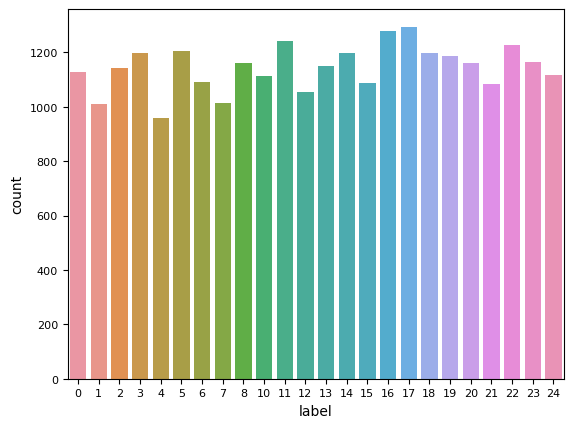

In [113]:
sns.countplot(x = 'label', data = train)

In [114]:
test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,135,119,108,102,105,99,61,103,121,133,...,108,112,116,114,118,180,184,176,167,163
7168,157,159,161,164,166,166,171,174,175,176,...,213,213,213,214,213,211,210,210,209,208
7169,190,191,190,191,190,190,192,192,191,192,...,216,215,213,214,214,213,210,211,209,208
7170,201,205,208,209,214,216,218,223,226,229,...,112,169,255,255,237,113,91,67,70,63


In [115]:
train_label = train['label']
train       = train.drop(columns = ['label'])
train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


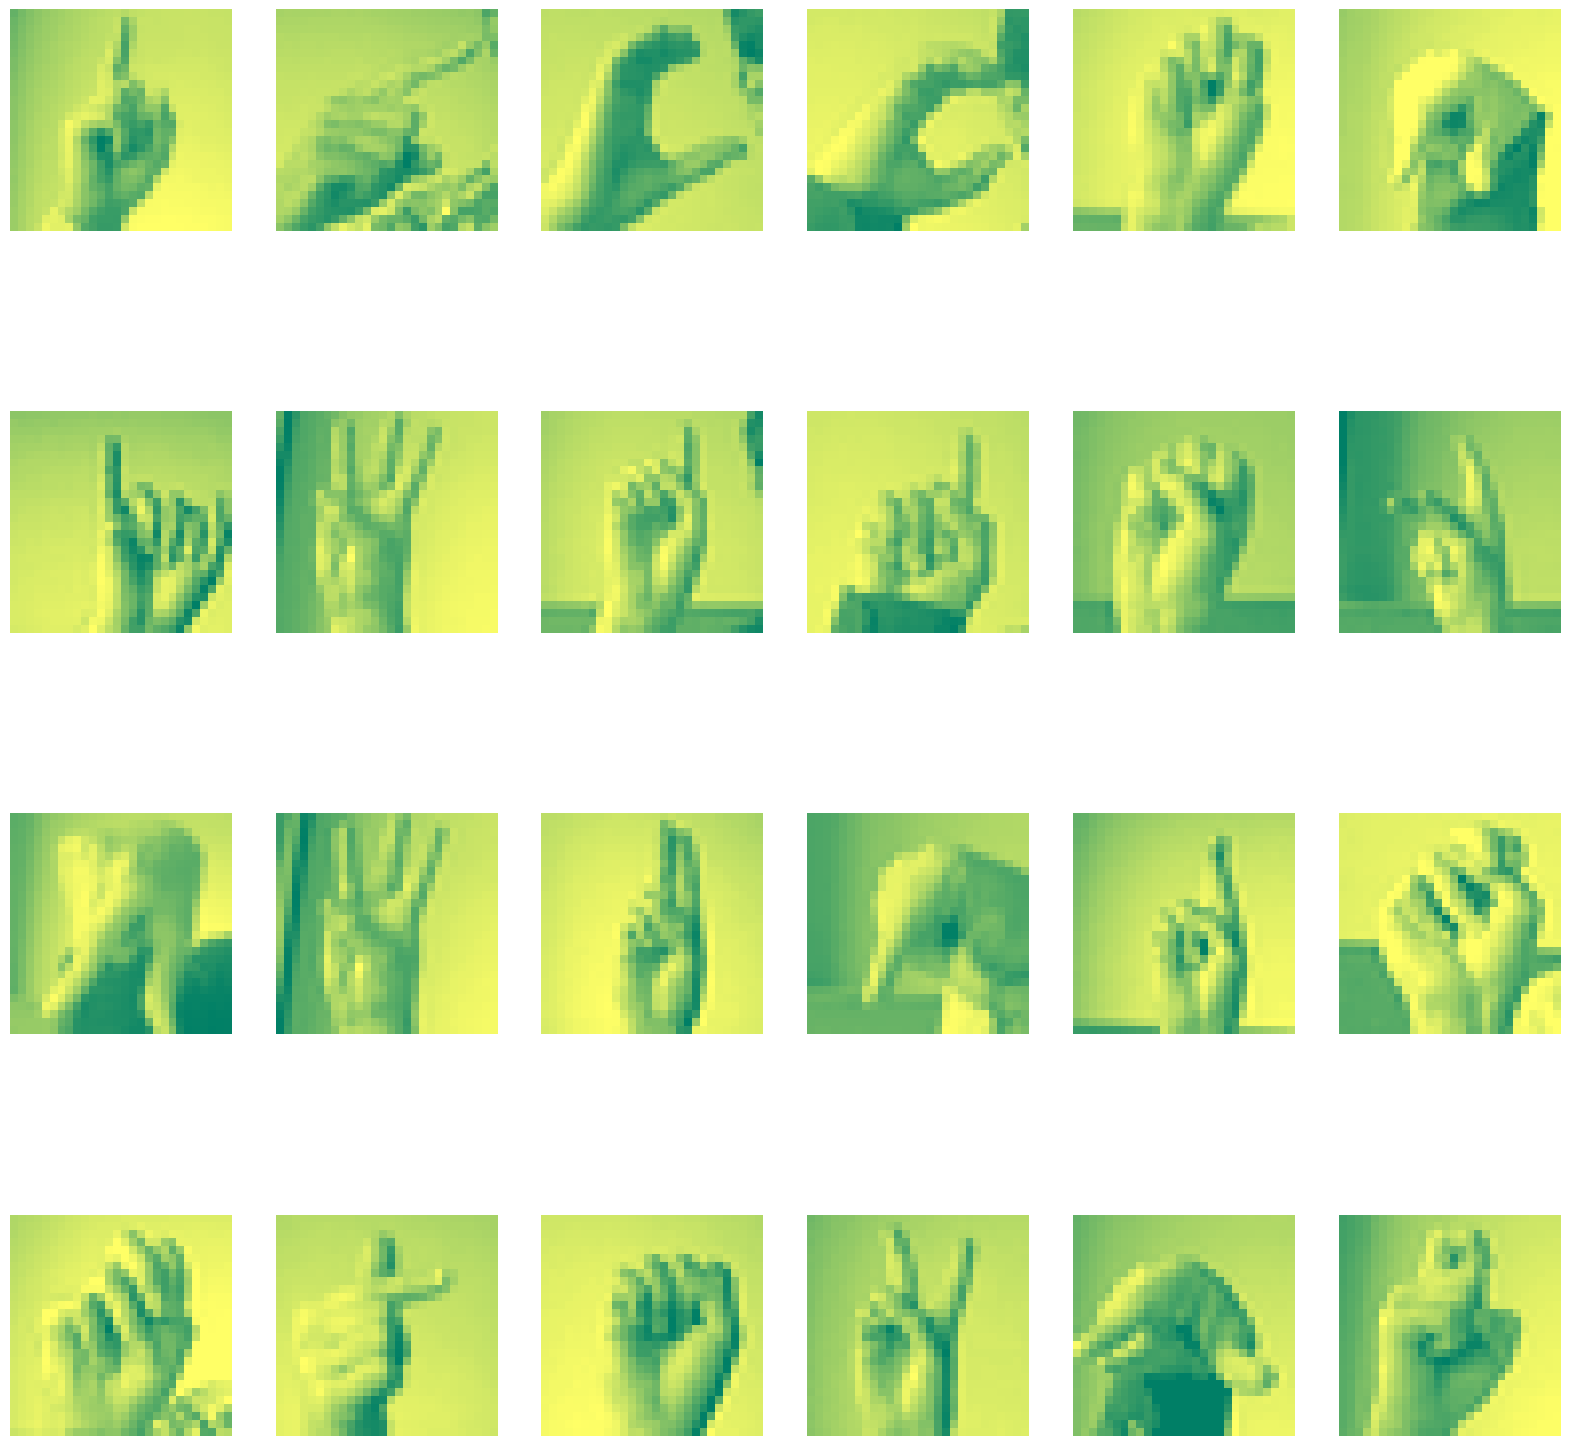

In [116]:
train = train.values.reshape(-1, 28,28,1).astype('float64')

def plot_Image (X_train):
    plt.rc('font', size=10)
    plt.rc('legend', fontsize= 10)
    plt.rc('xtick', labelsize= 8)
    plt.rc('ytick', labelsize= 8)

    fig, ax = plt.subplots(4, 6, figsize = (20, 20))

    img_idx = 0
    for i in range(4):
        for j in range(6):
            ax[i][j].imshow(X_train[img_idx], cmap = 'summer')
            ax[i][j].axis('off')
            img_idx += 1

    plt.show()
    
plot_Image(train)

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(train, train_label, test_size=0.2, shuffle = True, stratify = train_label,  
                                                    random_state=42 )

Y_train = LabelBinarizer().fit_transform(Y_train)
Y_test  = LabelBinarizer().fit_transform(Y_test)

X_train = X_train / 255.0
X_test  = X_test / 255.0

In [118]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(5,5),  padding='Same' , strides=(2,2), activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),  padding='Same', strides=(2,2), activation=tf.nn.relu))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same' , activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(24,activation=tf.nn.softmax))

model.summary()


model.compile(loss='CategoricalCrossentropy', metrics=['accuracy'], optimizer = Adam())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 14, 14, 64)        1664      
                                                                 
 conv2d_49 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
 dropout_18 (Dropout)        (None, 7, 7, 32)          0         
                                                                 
 conv2d_50 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 3, 3, 64)          0         
                                                     

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size = 128, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/20
172/172 [==============================] - 5s 23ms/step - loss: 2.4661 - accuracy: 0.2473 - val_loss: 1.0263 - val_accuracy: 0.7079
Epoch 2/20
172/172 [==============================] - 4s 22ms/step - loss: 0.9524 - accuracy: 0.6798 - val_loss: 0.3413 - val_accuracy: 0.9095
Epoch 3/20
172/172 [==============================] - 4s 22ms/step - loss: 0.5076 - accuracy: 0.8255 - val_loss: 0.1381 - val_accuracy: 0.9772
Epoch 4/20
172/172 [==============================] - 4s 22ms/step - loss: 0.3108 - accuracy: 0.8915 - val_loss: 0.0617 - val_accuracy: 0.9891
Epoch 5/20
172/172 [==============================] - 4s 22ms/step - loss: 0.2170 - accuracy: 0.9253 - val_loss: 0.0279 - val_accuracy: 0.9978
Epoch 6/20
172/172 [==============================] - 4s 22ms/step - loss: 0.1660 - accuracy: 0.9427 - val_loss: 0.0175 - val_accuracy: 0.9980
Epoch 7/20
172/172 [==============================] - 4s 22ms/step - loss: 0.1297 - accuracy: 0.9548 - val_loss: 0.0093 - val_accuracy: 0.9991

In [ ]:
Y = pd.read_csv('./data/sign_mnist_test.csv')
Y = Y.values.reshape(-1,28,28,1).astype('float64')

pred = model.predict(Y)

In [ ]:
df = pd.DataFrame(columns=["RowID","Label"])

df.Label   = [_.argmax() for _ in pred]
df.RowID = df.index+1
df.to_csv("./data/submission.csv", index = False)

df[:36]